In [1]:
import numpy as np

# Array Creation

In [2]:
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [3]:
b = np.zeros(5)
b

array([0., 0., 0., 0., 0.])

In [4]:
c = np.ones(5)
c

array([1., 1., 1., 1., 1.])

In [5]:
d = np.arange(0, 10, 2)
d

array([0, 2, 4, 6, 8])

In [6]:
e = np.linspace(0, 1, 5)
e

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

# Random Number Generation

In [7]:
# Seed for reproducibility
np.random.seed(42)

In [8]:
# Normal distribution
np.random.normal(0.07, 0.10, 10)

array([0.11967142, 0.05617357, 0.13476885, 0.22230299, 0.04658466,
       0.0465863 , 0.22792128, 0.14674347, 0.02305256, 0.124256  ])

In [9]:
# Uniform distribution
np.random.uniform(0, 1, 10)

array([0.18182497, 0.18340451, 0.30424224, 0.52475643, 0.43194502,
       0.29122914, 0.61185289, 0.13949386, 0.29214465, 0.36636184])

In [10]:
# Binomial distribution where n=10 is 10 trials or as an example 10 coin flips, p=0.5 is the probability of success, 10 samples is the number samples 
np.random.binomial(10, 0.5, 10)

array([5, 6, 4, 5, 5, 2, 5, 3, 3, 8])

In [11]:
np.random.binomial(10, 0.5, 5)

array([8, 6, 4, 3, 6])

# Vectorized Operations

In [12]:
x = np.array([1, 2, 3])
y = x + 5
z = x * x
x, y, z

(array([1, 2, 3]), array([6, 7, 8]), array([1, 4, 9]))

Vectorized operations are crucial in simulations where you apply formulas to thousands (or millions) of trials in one shot.

# Aggregation & Summarization

In [13]:
data = np.random.normal(5, 2, 10000)
mean = np.mean(data)
std = np.std(data)
percentiles = np.percentile(data, [5, 50, 95])
histogram = np.histogram(data)
mean, std, percentiles, histogram

(4.977417337301206,
 2.0067205952956213,
 array([1.65751909, 4.97425393, 8.2855889 ]),
 (array([  24,  140,  610, 1564, 2641, 2573, 1660,  627,  144,   17],
        dtype=int64),
  array([-2.16412521, -0.73889969,  0.68632583,  2.11155136,  3.53677688,
          4.9620024 ,  6.38722793,  7.81245345,  9.23767897, 10.6629045 ,
         12.08813002])))

# Exercises 1

### Problem 1

Simulate 1000 random values from a normal distribution with mean 2, stdev 0.5

In [14]:
prob_1 = np.random.normal(2, 0.5, 1000)
mean_1 = np.mean(prob_1)
std_1 = np.std(prob_1)
max_1 = np.max(prob_1)
min_1 = np.min(prob_1)
prob_1, mean_1, std_1, max_1, min_1

(array([3.07555136, 2.38514303, 1.91401213, 2.18625983, 2.68039318,
        1.55984191, 1.41359111, 2.20303958, 1.70657513, 0.87004932,
        1.37853333, 1.84428783, 2.02409438, 2.03898455, 3.00259817,
        1.89618737, 2.13906274, 1.18705399, 1.98443223, 2.16709947,
        1.31237026, 1.53300402, 2.24458432, 1.72683687, 1.94872911,
        2.27038876, 3.01843609, 1.8891074 , 2.88459904, 1.02061317,
        2.07418143, 1.8329554 , 1.73377051, 2.32903379, 1.89268967,
        0.98752333, 1.20581538, 2.36101348, 1.18138605, 2.37441059,
        2.06238674, 1.91485773, 1.95926291, 2.25737901, 1.41125701,
        2.02114555, 1.4302486 , 2.08182239, 2.32323839, 2.08297293,
        2.30430108, 1.64999258, 1.96890997, 1.88101209, 1.84828031,
        1.59967942, 1.78408873, 1.4436477 , 1.15292267, 1.64964167,
        2.31297982, 2.117033  , 1.3716984 , 1.79699432, 2.34623217,
        1.77575432, 1.2911169 , 3.12881427, 1.91652058, 1.41821055,
        2.08563176, 1.95719833, 1.22926095, 2.04

### Problem 2

What is the 95th percentile of those values?

In [15]:
percentile_95 = np.percentile(prob_1, 95)
percentile_95

2.8491548057250373

### Problem 3

If you compound those 1000 value annually for 5 years (assume initial = 1000), what's the average final value?

In [16]:
n = 5
pv = 1000
percent = prob_1 / 100

comp = pv * ((1 + percent) ** n)
mean_comp = np.mean(comp)
mean_comp

1103.3074755440364

# Multi-Period Monte Carlo Simulation with NumPy

## Goal: Simulate the future value of an investment over multiple years (say 5), where each year has its own random return.  Do this across many simulation paths.

In [17]:
init_inv = 1000
inv_n = 5
exp_ret = 0.02
exp_stdev = 0.005
sims = 1000

In [18]:
# Creates a matrix of shape (1000, 5); each row is one simulation, and each column is a random annual return for one of the 
# five years, where we might get [0.0195, 0.0213, 0.0179, 0.0222, 0.0201]
returns_multi = np.random.normal(exp_ret, exp_stdev, (sims, inv_n))

In [19]:
growth_factors = 1 + returns_multi # each value tells you how much the investment multiplies that year
future_values = init_inv * np.prod(growth_factors, axis=1) # this does the compounding where we multiply across the 5 years for each row

# this might give us something like 1000 x 1.0195 x 1.0213 x 1.0179 x 1.0222 x 1.0201 with the result being a 1D array of 1000 future values

In [20]:
mean_fv = np.mean(future_values)
percentiles = np.percentile(future_values, [5, 50, 95])
mean_fv, percentiles

(1104.292789586036, array([1083.39028567, 1104.89350622, 1124.70627315]))

# Visualization 1: Histogram of Final Outcomes

In [21]:
import matplotlib.pyplot as plt

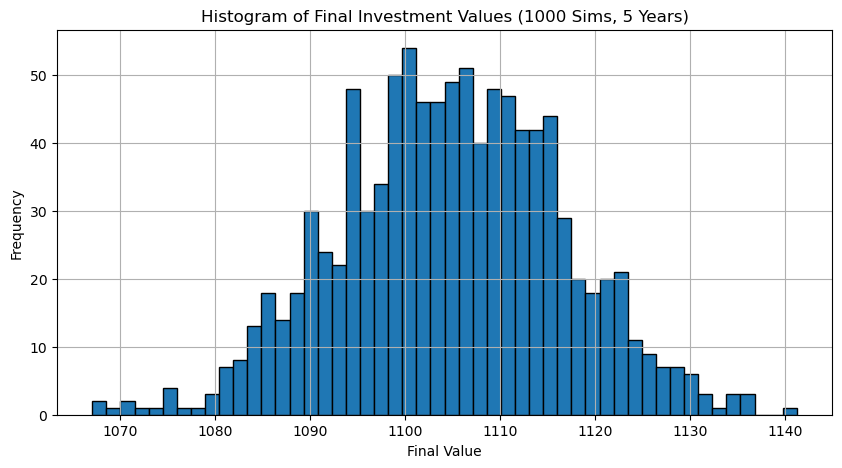

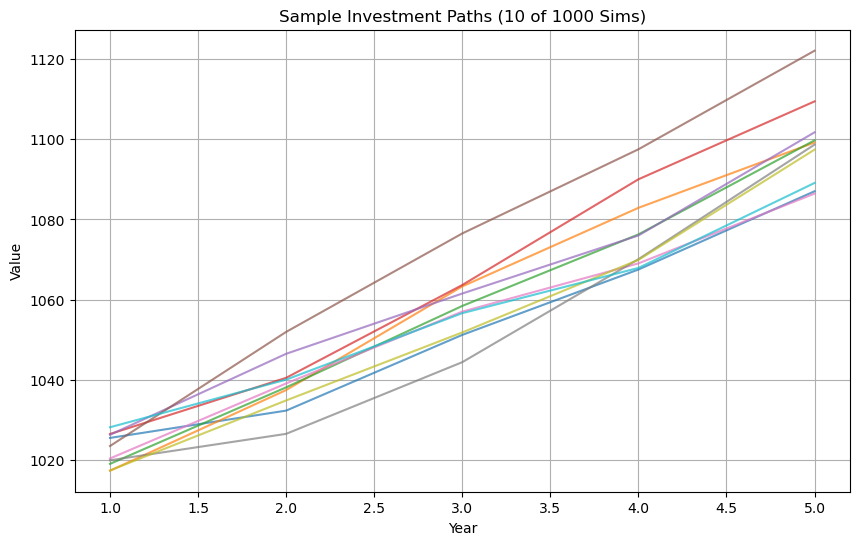

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial = 1000
years = 5
sims = 1000
mean = 0.02
stdev = 0.005

# Simulate random returns for each year in each simulation
returns = np.random.normal(mean, stdev, (sims, years))

# Growth factors for each year
growth_factors = 1 + returns

# Cumulative value for each simulation path over time
cumulative_growth = np.cumprod(growth_factors, axis=1)  # shape = (sims, years)
final_values = initial * cumulative_growth[:, -1]       # final value after 5 years

# ðŸ“Š Visualization 1: Histogram of Final Values
plt.figure(figsize=(10, 5))
plt.hist(final_values, bins=50, edgecolor='black')
plt.title("Histogram of Final Investment Values (1000 Sims, 5 Years)")
plt.xlabel("Final Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# ðŸ“ˆ Visualization 2: Sample Simulation Paths
plt.figure(figsize=(10, 6))
for i in range(10):  # plot 10 random simulations
    plt.plot(np.arange(1, years+1), initial * cumulative_growth[i], alpha=0.7)
plt.title("Sample Investment Paths (10 of 1000 Sims)")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.show()